# CS-433 Project 1 by group twohundredbpm

## Useful imports

In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
from cost import *
from gradients import *
from preprocessing import *
from cross_validation import *
from plot import *
%load_ext autoreload
%autoreload 2

## Getting data

In [6]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'Data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [7]:
DATA_TEST_PATH = 'Data/test.csv'  # TODO: download train data and supply path here
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Running cross-validation to get the best hyper-parameters

In [10]:
tX_cross = tX.copy()
tX_cross = preprocess(tX_cross)

In [11]:
print(np.logspace(-5, -2, 4))

[1.e-05 1.e-04 1.e-03 1.e-02]


In [15]:
performances = []
degrees = np.arange(9,14)
lambdas=np.logspace(-5, -2, 10)

for idx in range(len(tX)):
    train_x_jet = tX_cross[idx]
    train_y_jet = y[idx]
    test_x_jet = tX_test[idx]
    
    performance, best_params = cross_validation(train_y_jet, train_x_jet,
                     degrees=degrees, lambdas=lambdas)
    performances.append(performance)
    
    print("for model {}, the best parameters are : \n".format(idx+1),
          "degree = ", best_params[0], " lambda = ", best_params[1])

mean for  1e-05   0.8429718151973739
mean for  2.1544346900318823e-05   0.8430418768516295
mean for  4.641588833612782e-05   0.8430318680438788
mean for  0.0001   0.8430819120826327
mean for  0.00021544346900318823   0.8429718151973739
mean for  0.00046415888336127773   0.8426315157338458
mean for  0.001   0.8430118504283769
mean for  0.002154434690031882   0.8426815597725997
mean for  0.004641588833612777   0.839658899831852
mean for  0.01   0.8413103531107374
mean for  1e-05   0.8423412603090719
mean for  2.1544346900318823e-05   0.8424813836175834
mean for  4.641588833612782e-05   0.8424213307710785
mean for  0.0001   0.8425414364640883
mean for  0.00021544346900318823   0.8425714628873409
mean for  0.00046415888336127773   0.8425914805028425
mean for  0.001   0.8371266714708944
mean for  0.002154434690031882   0.8424913924253343
mean for  0.004641588833612777   0.8406097365681799
mean for  0.01   0.8359956761950517
mean for  1e-05   0.8429217711586197
mean for  2.1544346900318823e-

mean for  2.1544346900318823e-05   0.8359953077061902
mean for  4.641588833612782e-05   0.8359050712867714
mean for  0.0001   0.8360855441256091
mean for  0.00021544346900318823   0.8359501894964807
mean for  0.00046415888336127773   0.835769716657643
mean for  0.001   0.8351380617217109
mean for  0.002154434690031882   0.8342808157372317
mean for  0.004641588833612777   0.8313030138964086
mean for  0.01   0.8253474102147628
mean for  1e-05   0.8396047644829453
mean for  2.1544346900318823e-05   0.8394242916441076
mean for  4.641588833612782e-05   0.8394242916441076
mean for  0.0001   0.8393340552246885
mean for  0.00021544346900318823   0.8394242916441076
mean for  0.00046415888336127773   0.8395145280635264
mean for  0.001   0.8395145280635264
mean for  0.002154434690031882   0.83599530770619
mean for  0.004641588833612777   0.8327016783974011
mean for  0.01   0.8257083558924382
mean for  1e-05   0.8402364194188775
mean for  2.1544346900318823e-05   0.831032304638152
mean for  4.6415

### Displaying cross-validation results :

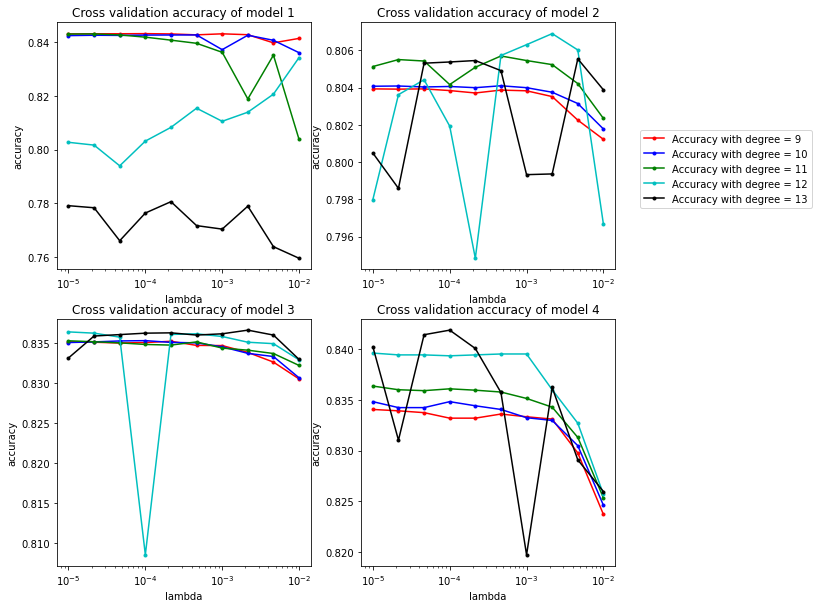

<Figure size 432x288 with 0 Axes>

In [16]:
display_cross_validation(performances, degrees)

## Building the model and retrieving prediction

In [14]:
# setting up parameters
# degrees = [11, 12, 13, 12]
# lambdas = [0.001009312, 0.001009312, 1.1212e-05, 0.0000696969]
degrees = [12, 12, 13, 13]
lambdas = [0.002, 0.002, 4.6e-4, 4.6e-4]

# Removing irrelevant columns from the jet groups:
tX = preprocess(tX)
tX_test = preprocess(tX_test)

# Instancing predictions
y_pred = []

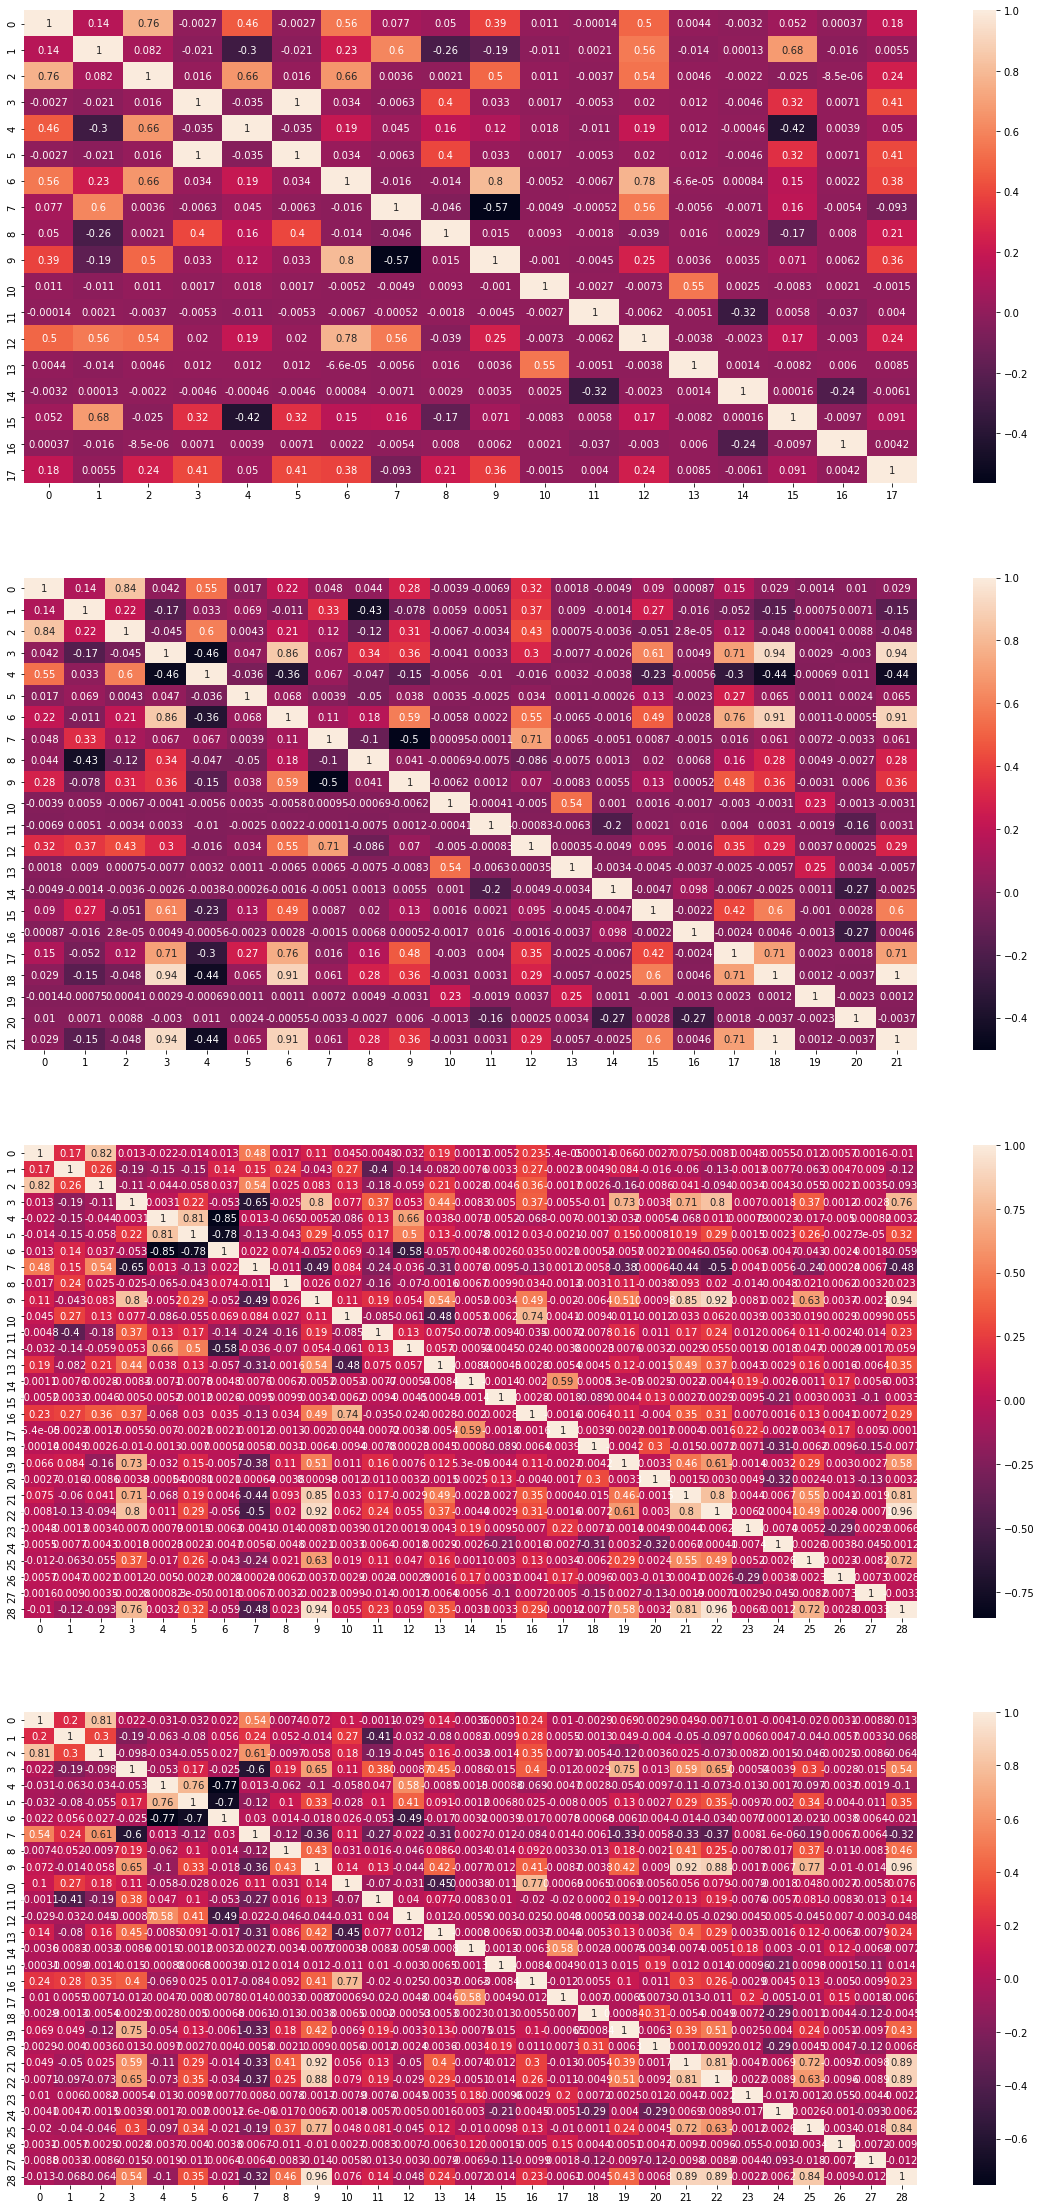

In [17]:
f,axs = plt.subplots(4,1,figsize=(20, 40))

corr_heatmap1=sb.heatmap(np.corrcoef(tX[0].T), annot=True,ax=axs[0])
corr_heatmap2=sb.heatmap(np.corrcoef(tX[1].T), annot=True,ax=axs[1])
corr_heatmap3=sb.heatmap(np.corrcoef(tX[2].T), annot=True,ax=axs[2])
corr_heatmap4=sb.heatmap(np.corrcoef(tX[3].T), annot=True,ax=axs[3])
f.savefig("Training data features heatmaps")

In [20]:
# Building models
for idx in range(len(tX)):
    print("Beginning training on model ", idx+1)

    # extracting the values of specific group :
    train_x_jet = tX[idx]
    train_y_jet = y[idx]
    test_x_jet = tX_test[idx]

    # Polynomial feature expansion :
    tX_train_poly = polynomial_expansion(train_x_jet, degrees[idx])
    tX_test_poly = polynomial_expansion(test_x_jet, degrees[idx])

    w_, loss_ = ridge_regression(train_y_jet, tX_train_poly, lambdas[idx])

    accuracy_ = compute_accuracy(train_y_jet, tX_train_poly, w_)
    print('The accuracy of model {} is equal to {}'.format(int(idx+1), accuracy_))

    y_pred_jet = predict_labels(w_, tX_test_poly)

    y_pred.append(y_pred_jet)

Beginning training on model  1
The accuracy of model 1 is equal to 0.8435839180086675
Beginning training on model  2
The accuracy of model 2 is equal to 0.8072062313009388
Beginning training on model  3
The accuracy of model 3 is equal to 0.8363206891760456
Beginning training on model  4
The accuracy of model 4 is equal to 0.6386933766468147


In [21]:
%%capture
# Building back the prediction array from the sorted ones
y_total = np.zeros(len(np.hstack(ids_test)))

min_id_test = min(np.hstack(ids_test))

ids_total = np.arange(len(y_total))
ids_total += min_id_test

for jet_num in range(len(y)):
    for j in range(len(y_pred[jet_num])):
        y_total[ids_test[jet_num][j] - min_id_test] = y_pred[jet_num][j]

y_total.reshape(-1, 1)

## Building output

In [22]:
OUTPUT_PATH = "Data/doto.csv"
print('Building output file in ', OUTPUT_PATH)
create_csv_submission(ids_total, y_total, OUTPUT_PATH)

Building output file in  Data/doto.csv
